# 2008 Economic Collapse in US(EDA)

In [3]:
# Analysis of top US banks during financial collapse. Here i have analysed data of 13 years from 01-01-2006 to 01-01-2016.

In [4]:
#First we need to load the data using google or yahoo API's.

In [5]:
#importing required modules and libraries.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

#for interactive graphs
import plotly
import cufflinks as cf 
cf.go_offline()

#to read data from internet
from pandas_datareader import data, wb

#for typecasting date and time
import datetime

In [6]:
#setting start and end date for analysis
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2019, 1, 1)

In [7]:
#Here i am using yahoo API to read data because google API has been depricated the data.

#Bank of America(ticker = BAC)
BAC = data.DataReader('BAC', 'yahoo', start, end)

#City Group(tickre = C)
C = data.DataReader('C', 'yahoo', start, end)

#Goldman Sachs(ticker = GS)
GS = data.DataReader('GS', 'yahoo', start, end)

#JP Morgan Chase (ticker = 'JPM')
JPM = data.DataReader('JPM', 'yahoo', start, end)

#Morgan Stanley (ticker = MS)
MS = data.DataReader('MS', 'yahoo', start, end)

#Wells Fargo (ticker = WFC)
WFC = data.DataReader('WFC', 'yahoo', start, end)

In [8]:
#Print few days of data and check the format and fields
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,35.953278
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,35.571438
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,35.617275
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,35.563797
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,35.586720


In [9]:
#Order the tickers in the list
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [10]:
#Concatenate the data of all banks in one dataframe by column
banks_data = pd.concat([BAC, C, GS, JPM, MS, WFC], axis = 1, keys = tickers)

In [11]:
banks_data.head(2)

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.953278   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  35.571438   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   

                                                WFC                     \
                Close     Volume  Adj Close    High     Low       Open   
Date                                                                     
2006-01-03  58.310001  5377000.0  38.591286  31.975  31.195  31.600000   
2006-01-04  58.349998  7977800.0  38.617764  31.820  31.365  31.799999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  21.485973  
2006-01-04  31.530001  10870000.0  21.236753  

[2 rows x 36 columns]

In [12]:
#As you can see we need to define column names for tickers and columns of data
banks_data.columns.names = ['Bank Ticker', 'Stock Info']

In [13]:
banks_data.head(2)

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.953278  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   35.571438  491.000000  483.500000  488.600006  483.799988  ...   

Bank Ticker         MS                                      WFC          \
Stock Info        Open      Close     Volume  Adj Close    High     Low   
Date                                                                      
2006-01-03   57.169998  58.310001  5377000.0  38.591286  31.975  31.195   
2006-01-04   58.700001  58.349998  7977800.0  38.617764  31.820  31.365   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  21.485973  
2006-01-04   31.799999  31.530001  10870000.0  21.236753  

[2 rows x 36 columns]

#### Now will Start with EDA(Exploratory Data Analysis)

In [14]:
#Lets print the Max and Min of closing price(In this case study, using 'Adj Close' price column.)
#Max
for ticker in tickers:
    print(ticker+' Closing Max - ', banks_data[ticker]['Adj Close'].max())

BAC Closing Max -  43.47975158691406
C Closing Max -  522.9844360351562
GS Closing Max -  268.126220703125
JPM Closing Max -  115.1534194946289
MS Closing Max -  60.49611282348633
WFC Closing Max -  62.875221252441406


In [15]:
#Another way of doing same thing by multi-indexing
banks_data.xs(key = ('Adj Close'), axis = 1, level = 'Stock Info').max()

Bank Ticker
BAC     43.479752
C      522.984436
GS     268.126221
JPM    115.153419
MS      60.496113
WFC     62.875221
dtype: float64

In [34]:
#Date on Max
banks_data.xs(key = 'Adj Close', axis = 1, level = 'Stock Info').idxmax()

Bank Ticker
BAC   2007-10-05
C     2006-12-27
GS    2018-03-12
JPM   2018-09-20
MS    2007-06-14
WFC   2018-01-26
dtype: datetime64[ns]

In [32]:
#Min
banks_data.xs(key = 'Adj Close', axis = 1, level = 'Stock Info').min()

Bank Ticker
BAC     2.849788
C       9.551726
GS     45.245651
JPM    12.458381
MS      7.807300
WFC     6.346923
dtype: float64

In [33]:
# Data on Min
#Min
banks_data.xs(key = 'Adj Close', axis = 1, level = 'Stock Info').idxmin()

Bank Ticker
BAC   2009-03-06
C     2009-03-05
GS    2008-11-20
JPM   2009-03-09
MS    2008-11-20
WFC   2009-03-05
dtype: datetime64[ns]

Now will print the percentage change in closing price after each day
Formula = (P(i) - P(i-1))/P(i-1)
So in python we have standard function for this.

In [17]:
#Will store in separate data frame
returns_Of_Bank = pd.DataFrame()

In [18]:
returns_Of_Bank = banks_data.xs(key = 'Adj Close', axis = 1, level = 'Stock Info').pct_change()

In [19]:
returns_Of_Bank.head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.005772,0.000686,-0.011599
2006-01-05,0.001289,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000645,-0.004731,0.012031,0.016242,0.010585,-0.000158


Here in above data first row is NaN, because we can not have percent change on the very first day.

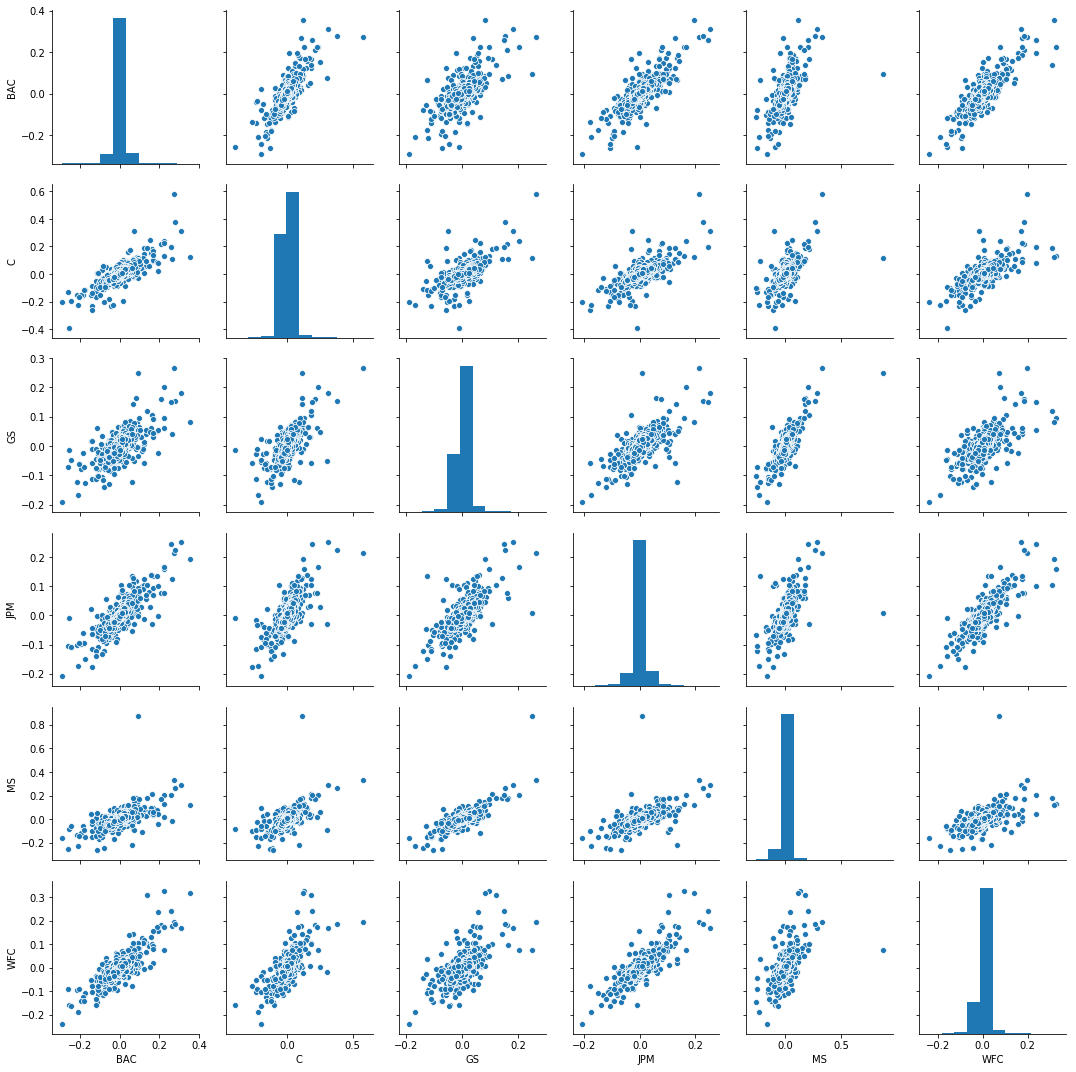

In [20]:
#Now will visualize the returns by using histgram and scatter plot.
sns.pairplot(returns_Of_Bank[1:])

#Now lets see the highest retuens date in the 10 years
returns_Of_Bank.idxmax()

In [21]:
#Now lets see the lowest retuens date in the 10 years
returns_Of_Bank.idxmin()

Bank Ticker
BAC   2009-01-20
C     2009-02-27
GS    2009-01-20
JPM   2009-01-20
MS    2008-10-09
WFC   2009-01-20
dtype: datetime64[ns]

As we can see that city group and JP Morgan had highest stock price on the same day i.e, 24-11-2008. But you can see that most of the companies stock's lowest price in JAN 2009. So end of 2008 and start of 2009 was financial collapse of US markets.

In [39]:
#Now will Check whick stock is getting frequently change means risky stock.
std = returns_Of_Bank.std()

In [45]:
std_df = pd.DataFrame(std, tickers)
std_df.columns = ['Standard Deviation']
std_df

,Standard Deviation
BAC,0.033139
C,0.034762
GS,0.023449
JPM,0.025113
MS,0.034101
WFC,0.027298


In [50]:
std_df.iplot()

As you can see city group had maximum deviation, so can say it was most risky stock

In [23]:
#Now will see that in 2018-19 how was the risk for these companies
returns_Of_Bank.ix['2018-01-01':'2019-01-01'].std()

Bank Ticker
BAC    0.015546
C      0.015104
GS     0.016160
JPM    0.013931
MS     0.017200
WFC    0.014766
dtype: float64

You can see that in 2018-19, Morgan Stanly was most risky stock.

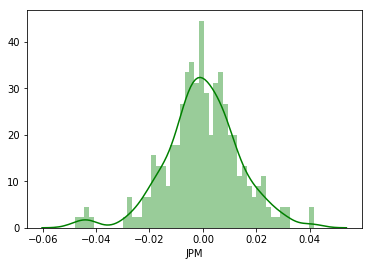

In [24]:
#Least risky stock
sns.distplot(returns_Of_Bank.ix['2018-01-01':'2019-01-01']['JPM'], color = 'green', bins = 50)

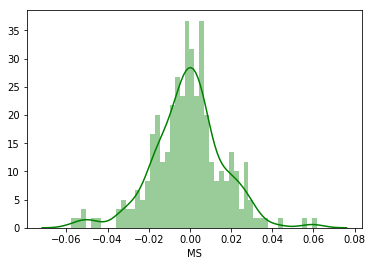

In [25]:
#Highest risky Stock
sns.distplot(returns_Of_Bank.ix['2018-01-01':'2019-01-01']['MS'], color = 'green', bins = 50)

In [26]:
#Now will visualize closing stock price in more interactive way of each companies
banks_data.xs(key = 'Adj Close', axis = 1, level = 'Stock Info').iplot()

As you see that highest drop in stock price is in city group.

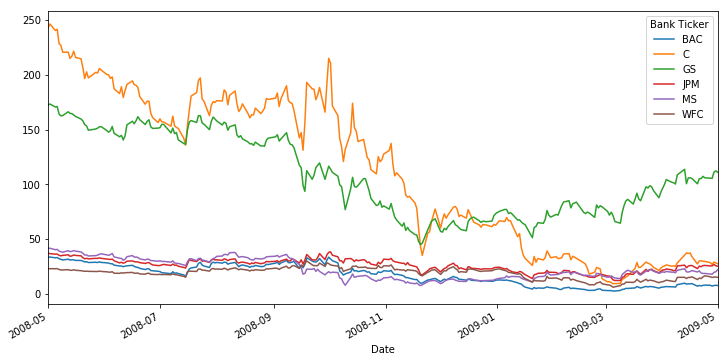

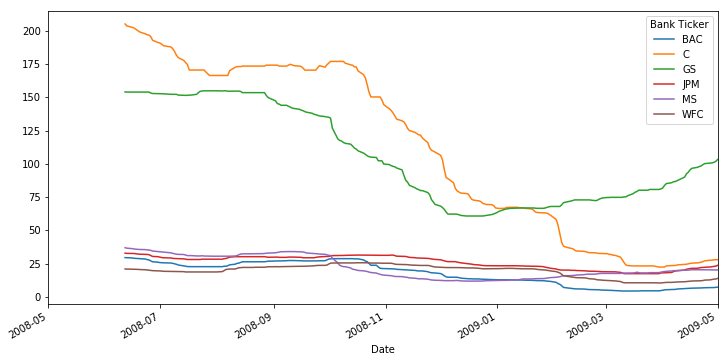

In [27]:
#Now plotting the closing price from May 2008-09 with rolling average for 30 days
banks_data.ix['2008-05-01': '2009-05-01'].xs(key = 'Adj Close', axis = 1, level = 'Stock Info').plot(figsize = (12,6))
banks_data.ix['2008-05-01': '2009-05-01'].xs(key = 'Adj Close', axis = 1, level = 'Stock Info').rolling(window = 30).median().plot(figsize = (12,6))

###### Now will see the related stocks means the stocks which were lost together and gain together

In [28]:
#Show heatmap; for that correalation matrix is required
banks_close_corr = banks_data.xs(key = 'Adj Close', axis = 1, level = 'Stock Info').corr()

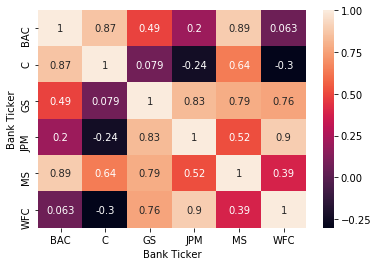

In [29]:
sns.heatmap(banks_close_corr, annot = True)

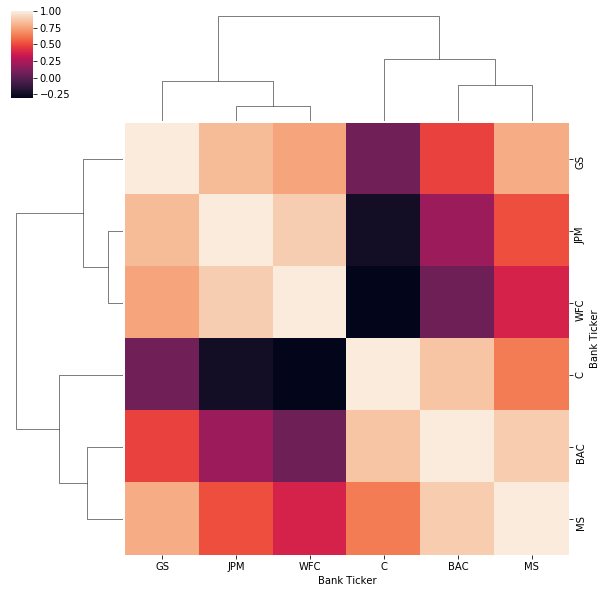

In [30]:
#This visualisation is little complex. lets show the clustermap
sns.clustermap(banks_close_corr)

Now you can see that WFC, JPM and GS are related and MS, BAC and C are related.

###### This is the end of our EDA.